# TASK 1: PREDICTION USING SUPERVISED ML (The Spark Foundation)

Graduate Rotational Internship Program

# Author: Oluwashina Dedenuola

In [44]:
#IMPORT RELEVANT LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Data loaded into Jupyter Notebook

In [45]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("Data imported successfully")
data
data.head()


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [66]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


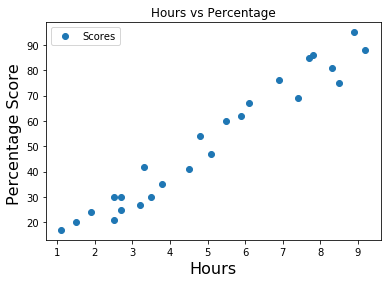

In [46]:
# Plotting the distribution of scores
data.plot (x = 'Hours',y = 'Scores', style = 'o')
plt.title('Hours vs Percentage') 
plt.xlabel('Hours',fontsize=16)
plt.ylabel('Percentage Score ',fontsize=16)
plt.show()

# Create a regression by declaring independent and dependent variable

In [47]:
#Time to plot the distribution of scores
x1 = data['Hours']
y = data['Scores']

In [48]:
# Often it is useful to check the shapes of the features
x1.shape

(25,)

In [49]:
y.shape

(25,)

In [50]:
# In order to feed x1 to sklearn, it should be a 2D array (a matrix)
# Therefore, it must be reshaped 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(25,1)
x1_matrix = x1.values.reshape(-1,1)

# Check the shape just in case
x1_matrix.shape

(25, 1)

In [51]:
reg = LinearRegression()  
reg.fit(x1_matrix, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# To get the R-squared in sklearn we must call the appropriate method
reg.score(x1_matrix,y)

0.9529481969048356

In [53]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
reg.coef_

array([9.77580339])

In [54]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
reg.intercept_

2.483673405373196

# Making predictions

In [56]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[2.5,9.5],columns=['Hours'])
new_data

,Hours
0,2.5
1,9.5


In [57]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

array([26.92318188, 95.35380562])

In [58]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_Percentage'] = reg.predict(new_data)
new_data

,Hours,Predicted_Percentage
0,2.5,26.923182
1,9.5,95.353806


# Regression Line

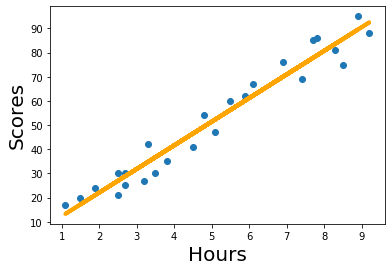

In [59]:
# Plotting the regression line
plt.scatter(x1, y)
yhat = reg.coef_*x1_matrix+ reg.intercept_
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show()

In [60]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [61]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [62]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [63]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [64]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.071877793635608


# Predicted score of student that studies for 9.5 hours is 95.4%